### Assignment 1 -- Take home exercise

In [1027]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1028]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import helpers.data_mining_helpers as dmh

In [1029]:
# prepare categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

# data transformation
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])

# add category to the dataframe
X['category'] = twenty_train.target
# add category name
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

---

#### Exercise 2
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information.


In [1030]:
#Answer here
# 1. Sorting using  sort_index()
# Last to first row
print("-" * 20 + "Last to first row" + "-" * 20)
l_2_f = X.sort_index(ascending=False)
print(l_2_f)

# First to last row
print("-" * 20 + "First to last row" + "-" * 20)
f_2_l = X.sort_index(ascending=True)
print(f_2_l)

--------------------Last to first row--------------------
                                                                                                                                                                                                         text  \
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re: Is MSG sensitivity superstition? Organization: S.P. Dyer Computer Consulting, Cambridge MA Lines: 14  In article <1qnns0$4l3@agate.berkeley.edu> spp@...   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> Subject: FAQ: Typing Injuries (2/4): General Info [monthly posting] Supersedes: <typing-injury-faq/general_734664243@cs.berkeley.edu> Organization: Uni...   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill) Subject: Re: jiggers Originator: sasghm@theseus.unx.sas.com Nntp-Posting-Host: theseus.unx.sas.com Organization: SAS Institute Inc. Lines: 62   I ma...   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway) Subject: Transplant Recipients Newsletter, April `93

In [1031]:
# 2. query where categories are 'sci.med' or 'soc.religion.christian' and sort by category numbers
query = X.query('category in (2,3)').sort_values(by='category')
query

,text,category,category_name
2256,"From: dyer@spdcc.com (Steve Dyer) Subject: Re: Is MSG sensitivity superstition? Organization: S.P. Dyer Computer Consulting, Cambridge MA Lines: 14 In article <1qnns0$4l3@agate.berkeley.edu> spp@...",2,sci.med
1775,From: leisner@wrc.xerox.com (Marty Leisner 71348 ) Subject: Intravenous antibiotics Reply-To: leisner@eso.mc.xerox.com Organization: Xerox X-Newsreader: TIN [version 1.1 PL9] I recently had a cas...,2,sci.med
888,"From: ls8139@albnyvms.bitnet (larry silverberg) Subject: podiatry School info? Reply-To: ls8139@albnyvms.bitnet Organization: University of Albany, SUNY Lines: 21 Hello, I am planning on attendi...",2,sci.med
889,"From: mmatusev@radford.vak12ed.edu (Melissa N. Matusevich) Subject: Re: HELP ME INJECT... Organization: Virginia's Public Education Network (Radford) Lines: 5 According to a previous poster, one ...",2,sci.med
890,"From: jim.zisfein@factory.com (Jim Zisfein) Subject: Re: Migraines and scans Distribution: world Organization: Invention Factory's BBS - New York City, NY - 212-274-8298v.32bis Reply-To: jim.zisf...",2,sci.med
...,...,...,...
981,From: erh0362@tesla.njit.edu Subject: Mormon beliefs about bastards Organization: New Jersey Institute of Technology Lines: 14 Could anyone enlighten me on how the Mormon church views child...,3,soc.religion.christian
986,"From: maridai@comm.mot.com (Marida Ignacio) Subject: Re: ""Accepting Jesus in your heart..."" Organization: trunking_fixed Lines: 34 |whitsebd@nextwork.rose-hulman.edu (Bryan Whitsell) writes:...",3,soc.religion.christian
989,"From: mcovingt@aisun3.ai.uga.edu (Michael Covington) Subject: Re: When are two people married in God's eyes? Organization: AI Programs, University of Georgia, Athens Lines: 39 To recapitulate a b...",3,soc.religion.christian
994,From: atterlep@vela.acs.oakland.edu (Cardinal Ximenez) Subject: Re: A question that has bee bothering me. Organization: National Association for the Disorganized Lines: 18 wquinnan@sdcc13.ucsd.ed...,3,soc.religion.christian


In [1032]:
# 3. Group by category and count the row
count_category_types = X.groupby(by=['category', 'category_name'], group_keys=True).count().sort_values(by=['text'],
                                                                                                        ascending=False)
count_category_types

,,text
category,category_name,
3,soc.religion.christian,599
2,sci.med,594
1,comp.graphics,584
0,alt.atheism,480


In [1033]:
# 4. Calculate statistic values
print("average records per category: ", count_category_types['text'].mean())
print("median records per category: ", count_category_types['text'].median())
print("max records among categories: ", count_category_types['text'].min())
print("min records among categories: ", count_category_types['text'].max())

average records per category:  564.25
median records per category:  589.0
max records among categories:  480
min records among categories:  599


#### Exercise 5
Please check the data and the process below, describe what you observe and why it happened.
$Hint$ :  why `.isnull()` didn't work?

In [1034]:
NA_dict = [{'id': 'A', 'missing_example': np.nan},
           {'id': 'B'},
           {'id': 'C', 'missing_example': 'NaN'},
           {'id': 'D', 'missing_example': 'None'},
           {'id': 'E', 'missing_example': None},
           {'id': 'F', 'missing_example': ''}]

NA_df = pd.DataFrame(NA_dict, columns=['id', 'missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [1035]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

#### Exercise 5 - Answer
According to the pandas document on how to use .isnull(). The function check if the attributes contain data type NaN, None, and NaT, if so it then returns True.
- If we see data of the ids (C, D, and F), isnull() returns False, because they are values declared inside the single quote ('') which indicate that they are type string.

Then ids A, B and E are false, the reason are as follows:
1. For the id ‘A’, if we look up into the declaration of np.nan. It is actually equal to NaN.
2. For the id ‘B’, it doesn’t have an attribute missing_example. It returns nothing when trying to get the value. Isnull() treats it as a None.
3. And for the id ‘E’, for sure, is type None.

----

#### Exercise 6
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [1036]:
X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14 Does anyone know of a good way (stan...,1,comp.graphics
1,"From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28 \tHi, \tI have a p...",1,comp.graphics
2,"From: djohnson@cs.ucsd.edu (Darin Johnson) Subject: Re: harrassed at work, could use some prayers Organization: =CSE Dept., U.C. San Diego Lines: 63 (Well, I'll email also, but this may apply to ...",3,soc.religion.christian
3,"From: s0612596@let.rug.nl (M.M. Zwart) Subject: catholic church poland Organization: Faculteit der Letteren, Rijksuniversiteit Groningen, NL Lines: 10 Hello, I'm writing a paper on the role of t...",3,soc.religion.christian
4,"From: stanly@grok11.columbiasc.ncr.com (stanly) Subject: Re: Elder Brother Organization: NCR Corp., Columbia SC Lines: 15 In article <Apr.8.00.57.41.1993.28246@athos.rutgers.edu> REXLEX@fnal.gov ...",3,soc.religion.christian
5,"From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B. Velasco Jr.) Subject: Re: The arrogance of Christians Organization: Case Western Reserve Univ. Cleveland, Ohio (USA) Lines: 28 In article <Apr.22.0...",3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph dale fisher) Subject: Re: anger Organization: Indiana University Lines: 34 In article <Apr.17.01.10.44.1993.2232@geneva.rutgers.edu> news@cbnewsk.att...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge) Subject: Re: Teenage acne Organization: NETCOM On-line Communication Services (408 241-9760 guest) Lines: 57 pchurch@swell.actrix.gen.nz (Pat Church...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: Re: Blindsight Reply-To: geb@cs.pitt.edu (Gordon Banks) Organization: Univ. of Pittsburgh Computer Science Lines: 18 In article <werner-240393161954@...,2,sci.med
9,"From: libman@hsc.usc.edu (Marlena Libman) Subject: Need advice with doctor-patient relationship problem Organization: University of Southern California, Los Angeles, CA Lines: 64 NNTP-Posting-Host...",2,sci.med


In [1037]:
# 1st test: random without setting random_state
X_sample = X.sample(n=1000)
len(X_sample)
X_sample[0:10]

,text,category,category_name
408,From: dgf1@quads.uchicago.edu (David Farley) Subject: Re: Photoshop for Windows Reply-To: dgf1@midway.uchicago.edu Organization: University of Chicago Lines: 25 In article <C5uHIM.JFq@rot.qc.ca> ...,1,comp.graphics
1244,"From: jvigneau@cs.ulowell.edu (Joe Vigneau) Subject: Re: [soc.motss, et al.] ""Princeton axes matching funds for Boy Scouts"" In-Reply-To: bevans@carina.unm.edu's message of 4 Apr 1993 12:19:20 GMT ...",0,alt.atheism
1913,"From: kaminski@netcom.com (Peter Kaminski) Subject: Re: What about sci.med.chemistry Article-I.D.: netcom.kaminskiC52n0s.2uA Organization: The Information Deli - via Netcom / San Jose, California ...",2,sci.med
2229,From: jcj@tellabs.com (jcj) Subject: Re: proof of resurection Organization: Huh? Whuzzat? Lines: 14 In article <Apr.16.23.15.09.1993.1823@geneva.rutgers.edu> smayo@world.std.com (Scott A Mayo) w...,3,soc.religion.christian
224,From: jkjec@westminster.ac.uk (Shazad Barlas) Subject: iterations of the bible Organization: University of Westminster Lines: 53 Hi... I'm not a religious guy so dont take this as some kinda flam...,3,soc.religion.christian
494,"From: alvin@spot.Colorado.EDU (Kenneth Alvin) Subject: Re: Assurance of Hell Organization: University of Colorado, Boulder Lines: 31 In article <Apr.20.03.01.19.1993.3755@geneva.rutgers.edu> REXL...",3,soc.religion.christian
306,From: mussack@austin.ibm.com (Christopher Mussack) Subject: Re: tuff to be a Christian? Organization: IBM Austin Lines: 66 Please realize that I am frequently getting in trouble for straying from...,3,soc.religion.christian
584,"From: perry@dsinc.com (Jim Perry) Subject: Re: [soc.motss, et al.] ""Princeton axes matching funds for Boy Scouts"" Article-I.D.: dsi.1pq6skINNhi4 Distribution: usa Organization: Decision Support In...",0,alt.atheism
1344,"From: rog@cdc.hp.com (Roger Haaheim) Subject: Re: sex problem. Article-I.D.: news.C52E58.L8G Organization: HP California Design Center, Santa Clara, CA Lines: 15 Nntp-Posting-Host: hammer.cdc.hp.c...",2,sci.med
1335,"From: Petch@gvg47.gvg.tek.com (Chuck Petch) Subject: Daily Verse Organization: Grass Valley Group, Grass Valley, CA Lines: 4 Above all, love each other deeply, because love covers over a multitud...",3,soc.religion.christian


In [1038]:
# 2nd test: random with setting random_state
X_sample = X.sample(n=1000, random_state=1)
X_sample[0:10]

,text,category,category_name
367,From: echen@burn.ee.washington.edu (Ed Chen) Subject: Windows BMP to Sun raster or others? Article-I.D.: shelley.1r49iaINNc3k Distribution: world Organization: University of Washington Lines: 11 N...,1,comp.graphics
2108,"From: bobbe@vice.ICO.TEK.COM (Robert Beauchaine) Subject: Re: Genocide is Caused by Theism : Evidence? Organization: Tektronix Inc., Beaverton, Or. Lines: 26 In article <1qid04$fct@horus.ap.mchp....",0,alt.atheism
2170,"From: naren@tekig1.PEN.TEK.COM (Naren Bala) Subject: Re: Genocide is Caused by Atheism Organization: Tektronix, Inc., Beaverton, OR. Lines: 19 >snm6394@ultb.isc.rit.edu (S.N. Mozumder ) writes: ...",0,alt.atheism
1776,"From: whheydt@pbhya.pacbell.com (Wilson Heydt) Subject: Re: Ancient Books Organization: Pacific * Bell, San Ramon, CA Lines: 21 In article <Apr.9.01.11.35.1993.16957@athos.rutgers.edu>, cobb@alex...",3,soc.religion.christian
1335,"From: Petch@gvg47.gvg.tek.com (Chuck Petch) Subject: Daily Verse Organization: Grass Valley Group, Grass Valley, CA Lines: 4 Above all, love each other deeply, because love covers over a multitud...",3,soc.religion.christian
1271,"From: mangoe@cs.umd.edu (Charley Wingate) Subject: Re: Origins of the bible. Organization: U of Maryland, Dept. of Computer Science, Coll. Pk., MD 20742 Lines: 14 Adda Wainwright writes: >He sta...",0,alt.atheism
1555,"From: marka@hcx1.ssd.csd.harris.com (Mark Ashley) Subject: Re: SATANIC TOUNGES Organization: Harris CSD, Ft. Lauderdale, FL Lines: 23 In article <May.2.09.50.21.1993.11782@geneva.rutgers.edu> mmh...",3,soc.religion.christian
2247,From: daniels@math.ufl.edu (TV's Big Dealer) Subject: Re: Variants in the NT Text (cont.) Organization: Whatever Lines: 6 \tI wish to echo what D. Andrew Kille wrote. I know of no published for...,3,soc.religion.christian
1479,"From: armstrng@cs.dal.ca (Stan Armstrong) Subject: Re: Prodigal Son Organization: Math, Stats & CS, Dalhousie University, Halifax, NS, Canada Lines: 18 The parable of the Prodigal Son is not abou...",3,soc.religion.christian
1027,"From: csc3phx@vaxa.hofstra.edu Subject: Loosing color. Lines: 9 Hi guys. I am scanning in a color image and it looks fine on the screen. When I converted it into PCX,BMP,GIF files so as to get...",1,comp.graphics


In [1039]:
# 3rd test: without setting random_state again
X_sample = X.sample(n=1000)
X_sample[0:10]

,text,category,category_name
883,"From: bhjelle@carina.unm.edu () Subject: Re: My New Diet --> IT WORKS GREAT !!!! Organization: University of New Mexico, Albuquerque Lines: 27 NNTP-Posting-Host: carina.unm.edu Gordon Banks: >a...",2,sci.med
1782,"Subject: Re: Don't more innocents die without the death penalty? From: bobbe@vice.ICO.TEK.COM (Robert Beauchaine) Organization: Tektronix, Inc., Beaverton, OR. Lines: 26 In article <2942881697.0...",0,alt.atheism
1417,"From: jayne@mmalt.guild.org (Jayne Kulikauskas) Subject: ""Accepting Jeesus in your heart..."" Organization: Kulikauskas home Lines: 29 gsu0033@uxa.ecn.bgu.edu (Eric Molas) writes: > Firstly, I am...",3,soc.religion.christian
1862,"From: dbc@welkin.gsfc.nasa.gov (David Considine) Subject: Re: Is MSG sensitivity superstition? Organization: Code 916, NASA Goddard Space Flight Center Lines: 19 In article <1993Apr15.180459.1785...",2,sci.med
257,"From: af774@cleveland.Freenet.Edu (Chad Cipiti) Subject: Good shareware paint and/or animation software for SGI? Organization: Case Western Reserve University, Cleveland, OH (USA) Lines: 15 Reply-...",1,comp.graphics
1483,From: aaronc@athena.mit.edu (Aaron Bryce Cardenas) Subject: Re: Questions from a newbie Organization: Massachusetts Institute of Technology Lines: 7 Jerry Kaufman writes: >The Bible says that He...,3,soc.religion.christian
14,"From: sloan@cis.uab.edu (Kenneth Sloan) Subject: Re: More gray levels out of the screen Organization: CIS, University of Alabama at Birmingham Lines: 22 In article <C51C4r.BtG@csc.ti.com> rowland...",1,comp.graphics
168,From: mrl@pfc.mit.edu (Mark London) Subject: Corneal erosion/abrasions. Organization: MIT PLASMA FUSION CENTER Lines: 11 NNTP-Posting-Host: nerus.pfc.mit.edu For several years I have been dealing...,2,sci.med
342,From: dsc@gemini.gsfc.nasa.gov (Doug S. Caprette) Subject: CS chemical agent Organization: CDP VLBI Lines: 10 Can anyone provide information on CS chemical agent--the tear gas used recently in ...,2,sci.med
1948,"From: crussell@netcom.com (Chris Russell) Subject: Re: TIFF: philosophical significance of 42 (SILLY) Organization: Adaptive Solutions, Custom Software & Support 909/861-4048 X-Newsreader: TIN [v...",1,comp.graphics


In [1040]:
# 4th test: with setting random_state again
X_sample = X.sample(n=1000, random_state=1)
X_sample[0:10]

,text,category,category_name
367,From: echen@burn.ee.washington.edu (Ed Chen) Subject: Windows BMP to Sun raster or others? Article-I.D.: shelley.1r49iaINNc3k Distribution: world Organization: University of Washington Lines: 11 N...,1,comp.graphics
2108,"From: bobbe@vice.ICO.TEK.COM (Robert Beauchaine) Subject: Re: Genocide is Caused by Theism : Evidence? Organization: Tektronix Inc., Beaverton, Or. Lines: 26 In article <1qid04$fct@horus.ap.mchp....",0,alt.atheism
2170,"From: naren@tekig1.PEN.TEK.COM (Naren Bala) Subject: Re: Genocide is Caused by Atheism Organization: Tektronix, Inc., Beaverton, OR. Lines: 19 >snm6394@ultb.isc.rit.edu (S.N. Mozumder ) writes: ...",0,alt.atheism
1776,"From: whheydt@pbhya.pacbell.com (Wilson Heydt) Subject: Re: Ancient Books Organization: Pacific * Bell, San Ramon, CA Lines: 21 In article <Apr.9.01.11.35.1993.16957@athos.rutgers.edu>, cobb@alex...",3,soc.religion.christian
1335,"From: Petch@gvg47.gvg.tek.com (Chuck Petch) Subject: Daily Verse Organization: Grass Valley Group, Grass Valley, CA Lines: 4 Above all, love each other deeply, because love covers over a multitud...",3,soc.religion.christian
1271,"From: mangoe@cs.umd.edu (Charley Wingate) Subject: Re: Origins of the bible. Organization: U of Maryland, Dept. of Computer Science, Coll. Pk., MD 20742 Lines: 14 Adda Wainwright writes: >He sta...",0,alt.atheism
1555,"From: marka@hcx1.ssd.csd.harris.com (Mark Ashley) Subject: Re: SATANIC TOUNGES Organization: Harris CSD, Ft. Lauderdale, FL Lines: 23 In article <May.2.09.50.21.1993.11782@geneva.rutgers.edu> mmh...",3,soc.religion.christian
2247,From: daniels@math.ufl.edu (TV's Big Dealer) Subject: Re: Variants in the NT Text (cont.) Organization: Whatever Lines: 6 \tI wish to echo what D. Andrew Kille wrote. I know of no published for...,3,soc.religion.christian
1479,"From: armstrng@cs.dal.ca (Stan Armstrong) Subject: Re: Prodigal Son Organization: Math, Stats & CS, Dalhousie University, Halifax, NS, Canada Lines: 18 The parable of the Prodigal Son is not abou...",3,soc.religion.christian
1027,"From: csc3phx@vaxa.hofstra.edu Subject: Loosing color. Lines: 9 Hi guys. I am scanning in a color image and it looks fine on the screen. When I converted it into PCX,BMP,GIF files so as to get...",1,comp.graphics


#### Exercise 6 Answer
Once the sample() was executed, the value of the data list will be random. We can see from the indexes in the X_sample that were changed from the numerical sequence into non-sequence. But there the case when we set random_state value differently.
1. Result with undefined number to random_state argument
- The sample_output will be random everytime the code was executed.
2. Result with any number to random_state argument
- The sample output will remain the same as the first random result was shown.

#### Exercise 10
We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary? Try to do this as efficient as possible.

---

In [1041]:
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [1042]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
feature_names = count_vect.get_feature_names_out()

In [1043]:
print(count_vect.get_feature_names_out())

['00' '000' '0000' ... 'zzz' 'ªl' 'íålittin']


In [1044]:
# Answer here
arr = np.array(X_counts[4, :100].toarray())
search = np.where(arr == 1)
for result in search:
    print("index:", result[1], " value:", feature_names[result[1]])

index: 0  value: 00
index: 37  value: 01


---

### Exercise 11
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix.

By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram.

As an exercise you can try to modify the code above to plot the entire term-document matrix or just a sample of it.

How would you do this efficiently? Remember there is a lot of words in the vocab.

Report below what methods you would use to get a nice and useful visualization.

---

In [1045]:
# Answer here
# To be able to represent the documents without defining a huge sparse matrix.
# The documents can be stored as sequences. So texts to sequence technique is used here utilizing Tokenizer from keras.
# First, the documents are stored in the tokenizer. So then the sequences can be retrieved

from keras.preprocessing.text import Tokenizer

tok = Tokenizer()
tok.fit_on_texts(X.text)

text_encoded_phrase = tok.texts_to_sequences(X.text)
text_encoded_phrase

[[16,
  21486,
  943,
  277,
  184,
  424,
  9459,
  29,
  3408,
  329,
  3,
  1051,
  9460,
  2873,
  116,
  86,
  110,
  5909,
  38,
  1,
  943,
  71,
  33,
  365,
  72,
  139,
  66,
  2,
  4,
  103,
  117,
  532,
  625,
  1449,
  3684,
  2874,
  3,
  838,
  15711,
  5505,
  3825,
  289,
  123,
  9460,
  2873,
  414,
  28,
  45,
  77,
  70,
  3,
  37,
  1,
  147,
  3408,
  3,
  9461,
  1051,
  5910,
  289,
  174,
  425,
  54,
  602,
  6,
  14,
  1,
  507,
  215,
  233,
  7,
  795,
  424,
  424,
  9459,
  1831,
  1,
  170,
  2389,
  425,
  253,
  241,
  9459,
  184,
  277,
  943,
  1,
  943,
  71,
  1517,
  7629,
  8473,
  6393,
  21487,
  4889,
  481,
  7629,
  8473,
  21488,
  21489,
  21490],
 [16,
  15712,
  1029,
  3969,
  18,
  21491,
  258,
  21492,
  29,
  176,
  7630,
  4,
  7631,
  3970,
  741,
  4,
  5911,
  38,
  71,
  2,
  5506,
  536,
  2,
  1696,
  1630,
  33,
  839,
  617,
  9,
  19,
  4,
  167,
  9,
  429,
  50,
  2,
  1,
  21493,
  30,
  176,
  59,
  3685,
  1754,
  

In [1046]:
# After defining the document sequences we can use it as a index to refer to the word.
text_to_sequence_result = ""
for sequence in text_encoded_phrase[0]:
    text_to_sequence_result = text_to_sequence_result + " " + tok.index_word[sequence]
print("text_to_sequence_result:\n", text_to_sequence_result)
print("-" * 100)
print("original text:\n", X.text[0])

text_to_sequence_result:
  from sd345 city ac uk michael collier subject converting images to hp laserjet iii nntp posting host hampton organization the city university lines 14 does anyone know of a good way standard pc application pd utility to convert tif img tga files into laserjet iii format we would also like to do the same converting to hpgl hp plotter files please email any response is this the correct group thanks in advance michael michael collier programmer the computer unit email m p collier uk ac city the city university tel 071 477 8000 x3769 london fax 071 477 8565 ec1v 0hb
----------------------------------------------------------------------------------------------------
original text:
 From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We 

---

#### Exercise 12
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [1047]:
from sklearn.decomposition import PCA
import seaborn as sns

X_3d_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())

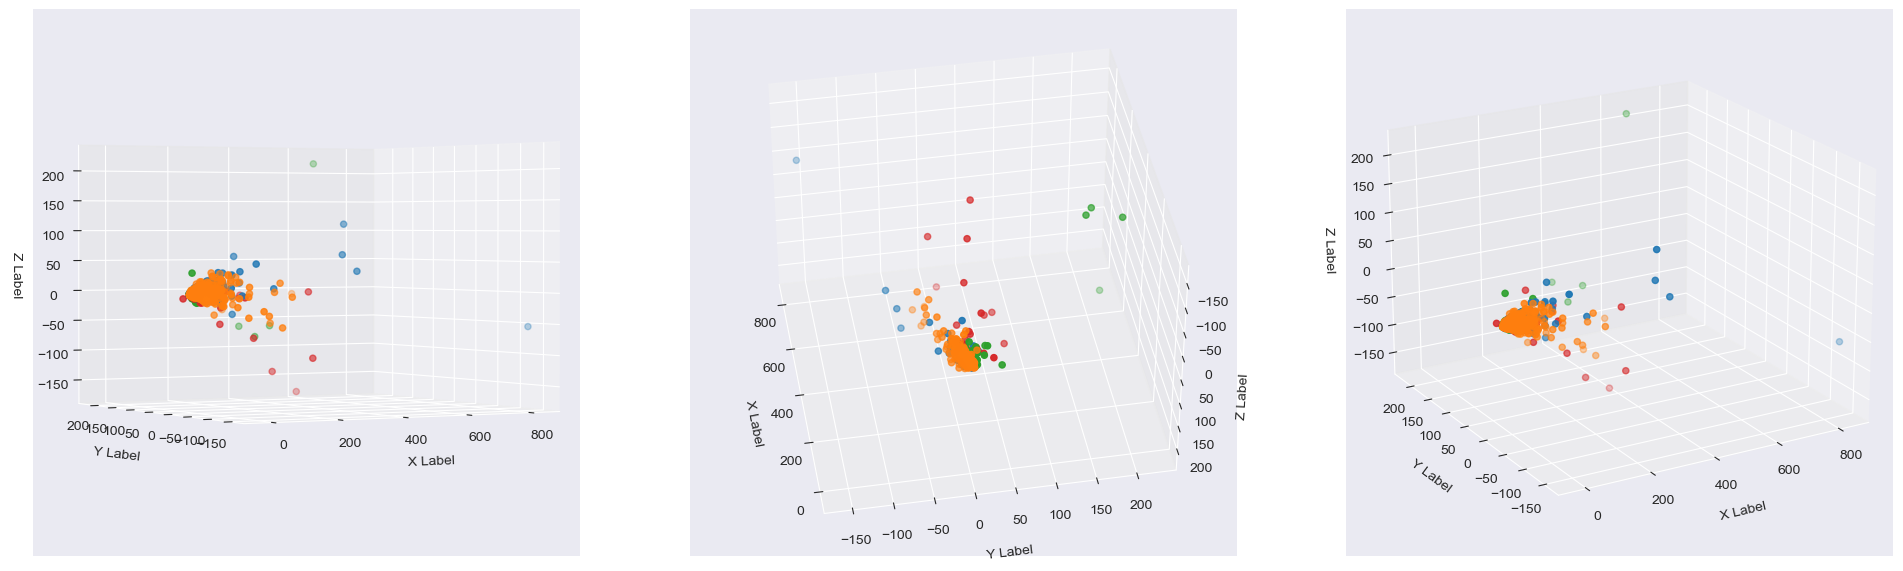

In [1048]:
view_points = [(1, -120), (-140, 10), (20, -120)]
col = ['coral', 'blue', 'black', 'm']

fig = plt.figure(figsize=(24, 24))

for index, view in enumerate(view_points):
    for c, category in zip(col, categories):
        xs = X_3d_reduced[X['category_name'] == category].T[0]
        ys = X_3d_reduced[X['category_name'] == category].T[1]
        zs = X_3d_reduced[X['category_name'] == category].T[2]
        ax = plt.subplot(1, 3, index + 1, projection='3d')
        ax.set_xlabel('\nX Label')
        ax.set_ylabel('\nY Label')
        ax.set_zlabel('\nZ Label')
        ax.view_init(view[0], view[1])
        ax.grid(color='grey', linestyle=':', linewidth=1, alpha=0.2)
        ax.scatter(xs, ys, zs, cmap=c, marker='o')

---

#### Exercise 13
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.
Tips:


/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecate

(-0.5, 399.5, 199.5, -0.5)

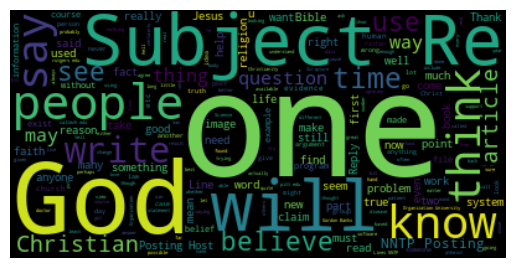

In [1049]:
# Use wordcloud to represent the mostly used words
from wordcloud import WordCloud

wordcloud = WordCloud().generate(" ".join(list(X.text)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [1050]:
import copy

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
word_df = pd.DataFrame(copy.deepcopy(count_vect.get_feature_names_out()))
word_df.insert(len(word_df.columns), "frequency", pd.DataFrame(term_frequencies), True)
word_df = word_df.sort_values("frequency", ascending=False)
word_df = word_df.rename(columns={0: "word"})

N = 20
display = word_df[:N]

([<matplotlib.patches.Wedge at 0x2f8b3b460>,
 [Text(0.9506712767638729, 0.5533752104459939, 'the'),
  Text(0.22324711434332176, 1.0771075739857092, 'of'),
  Text(-0.4406426416333931, 1.0078859371845335, 'to'),
  Text(-0.89258741373716, 0.642874566955334, 'and'),
  Text(-1.0830165937729543, 0.19254884474446396, 'is'),
  Text(-1.06830887880349, -0.26213763459226974, 'in'),
  Text(-0.8897610037173607, -0.6467807636779833, 'that'),
  Text(-0.624200311627189, -0.9057449811975335, 'it'),
  Text(-0.372317976963813, -1.0350745499864122, 'you'),
  Text(-0.14378929660849576, -1.0905616159487892, 'for'),
  Text(0.07440624684596339, -1.0974806196148967, 'not'),
  Text(0.2727738577742756, -1.065642727425538, 'this'),
  Text(0.4552033264535952, -1.0013939941829, 'be'),
  Text(0.6205772759417266, -0.9082311625267799, 'from'),
  Text(0.7656747731716108, -0.7897734749462041, 'are'),
  Text(0.8862498656149489, -0.6515835907214708, 'edu'),
  Text(0.9773196527859319, -0.5048230346154837, 'have'),
  Text(1

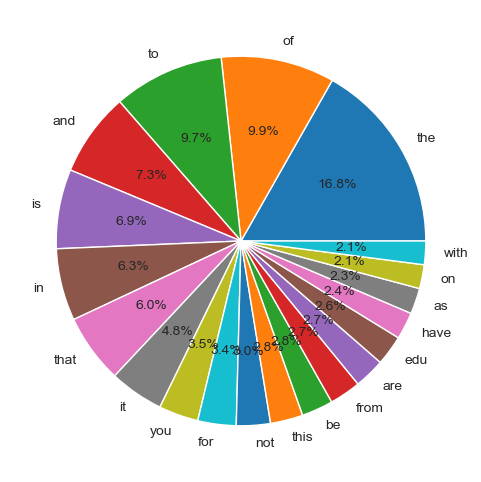

In [1051]:
# pie graph

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(display.frequency[:N], labels=display.word[:N], autopct='%.1f%%')

<AxesSubplot:title={'center':'Word Frequency'}, xlabel='word', ylabel='frequency'>

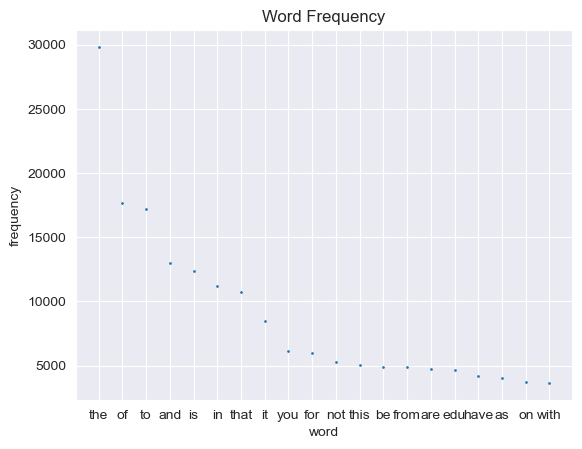

In [1052]:
# scatter graph
display.plot(kind='scatter', x='word', y='frequency',
             title='Word Frequency', s=0.9)

<AxesSubplot:title={'center':'Word Frequency'}, ylabel='Frequency'>

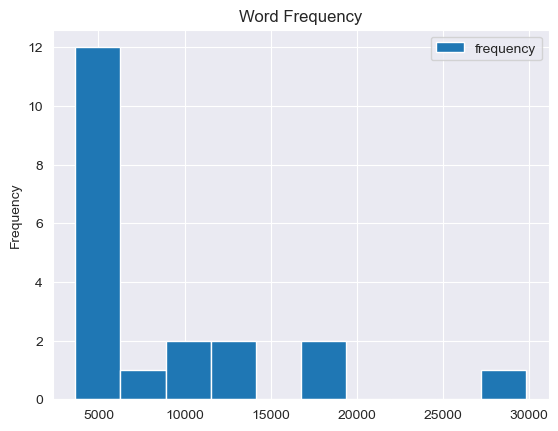

In [1053]:
# histogram
display.plot(kind='hist', x='word', y='frequency',
             title='Word Frequency')

### Topic Modeling
In order to derive meaningful visualization, LDA topic model can be utilized to see the insight information.
The LDA topic model using `LdaModel()`, we need the corpus and dictionary. Let’s create them first and then build the model.

### Tokenize Sentences and Clean
Removing the emails, new line characters, single quotes and finally split the sentence into a list of words using `simple_preprocess()`
and build bigram, trigram models and lemmatize (declare in the `data_mining_helpers.py`).

Lemmatize each word to its root form, keeping only nouns, adjectives, verbs and adverbs.

Keep only these POS tags because they are the ones contributing the most to the meaning of the sentences


In [1054]:
data = X.text.values.tolist()
data_words = list(dmh.sent_to_words(data))

In [1055]:
data_words[:1]

[['from',
  'michael',
  'collier',
  'subject',
  'converting',
  'images',
  'to',
  'hp',
  'laserjet',
  'iii',
  'nntp',
  'posting',
  'host',
  'hampton',
  'organization',
  'the',
  'city',
  'university',
  'lines',
  'does',
  'anyone',
  'know',
  'of',
  'good',
  'way',
  'standard',
  'pc',
  'application',
  'pd',
  'utility',
  'to',
  'convert',
  'tif',
  'img',
  'tga',
  'files',
  'into',
  'laserjet',
  'iii',
  'format',
  'we',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  'converting',
  'to',
  'hpgl',
  'hp',
  'plotter',
  'files',
  'please',
  'email',
  'any',
  'response',
  'is',
  'this',
  'the',
  'correct',
  'group',
  'thanks',
  'in',
  'advance',
  'michael',
  'michael',
  'collier',
  'programmer',
  'the',
  'computer',
  'unit',
  'email',
  'the',
  'city',
  'university',
  'tel',
  'london',
  'fax',
  'ec',
  'hb']]

In [ ]:
data_ready = dmh.process_words(data_words)  # processed Text Data!

In [ ]:
len(data_ready)

In [ ]:
import gensim
from gensim import corpora

# Create Dictionary
id2word = corpora.Dictionary(data_ready)
print(id2word)

In [ ]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]
corpus

In [ ]:
categories

In [ ]:
len(id2word)

The trained topics (keywords and weights) are printed below as well.
If we examine topic keywords, they are nicely segregate and collectively represent the topics we initially chose: atheism, religion, graphics and med.

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=len(categories),
                                            random_state=100,
                                            update_every=1,
                                            chunksize=10,
                                            passes=10,
                                            alpha='symmetric',
                                            iterations=100,
                                            per_word_topics=True)
lda_model.print_topics()

### Find The Dominant topic and its percentage contribution in each document

In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

In [ ]:
df_topic_sents_keywords = dmh.format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)
df_topic_sents_keywords

In [ ]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

#### The most representative sentence for each topic
Samples of sentences that most represent a given topic.

In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Percentage_Contribution'], ascending=False).head(1)],
                                            axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Percentage_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

### Frequency Distribution of Word Counts in Documents
When working with a large number of documents, you want to know how big the documents are as a whole and by topic.

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Text]
doc_lens

In [ ]:
plt.figure(figsize=(16, 7), dpi=160)
plt.hist(doc_lens, bins=1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750, 90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750, 80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750, 70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750, 60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0, 1000, 9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2, 2, figsize=(16, 14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins=1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: ' + str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0, 1000, 9))
plt.ylabel(["a", "b", "c", "d"])
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)

### Word Clouds of Top N Keywords in Each Topic
We have already seen what are the topic keywords in each topic, a word cloud with the size of the words proportional to the weight is a pleasant sight. The coloring of the topics have been taken here is followed in the subsequent plots as well.

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

In [ ]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
topics = lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Word Counts of Topic Keywords
When it comes to the keywords in the topics, the importance (weights) of the keywords matters. Along with that, how frequently the words have appeared in the documents is also interesting to look.

Plot the word counts and the weights of each keyword in the same chart.

We want to keep an eye out on the words that occur in multiple topics and the ones whose relative frequency is more than the weight.

Often such words turn out to be less important. The chart have been drawn below is a result of adding several such words to the stop words list in the beginning and re-running the training process.

In [ ]:
from collections import Counter

topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

In [ ]:
out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i, weight, counter[word]])
out

In [ ]:
df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
df

In [ ]:
# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id == i, :], color=cols[i], width=0.5, alpha=0.3,
           label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id == i, :], color=cols[i], width=0.2,
                label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030);
    ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id == i, 'word'], rotation=30, horizontalalignment='right')
    ax.legend(loc='upper left');
    ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)

#### Sentence Chart Colored by Topic
Each word in the document is representative of one of the 4 topics. Let’s color each word in the given documents by the topic id it is attributed to.
The color of the enclosing rectangle is the topic assigned to the document.

In [ ]:
from matplotlib.patches import Rectangle

In [ ]:
def sentences_chart(lda_model=lda_model, corpus=corpus, start=0, end=13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end - start, 1, figsize=(20, (end - start) * 0.95), dpi=160)
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i - 1]
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
            ax.text(0.01, 0.5, "Doc " + str(i - 1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1,
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end - 2), fontsize=22, y=0.95,
                 fontweight=700)
    plt.tight_layout()
    plt.show()


sentences_chart()

In [ ]:
dominant_topics, topic_percentages = dmh.topics_per_document(model=lda_model, corpus=corpus, end=-1)

### What are the most discussed topics in the documents?
Let’s compute the total number of documents attributed to each topic.

In [ ]:
# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

In [ ]:
# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False)
                   for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0, inplace=True)

- The number of documents for each topic by assigning the document to the topic that has the most weight in that document.
- The number of documents for each topic by summing up the actual weight contribution of each topic to respective documents.

In [ ]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(
    lambda x, pos: 'Topic ' + str(x) + '\n' + df_top3words.loc[df_top3words.topic_id == x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

###  t-SNE Clustering Chart
Let’s visualize the clusters of documents in a 2D space using t-SNE (t-distributed stochastic neighbor embedding) algorithm.

In [ ]:
# Get topic weights and dominant topics
# --------------------------------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

In [ ]:
# Get topic weights of each word in the corpus
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=1, init='pca', perplexity=30, n_iter=3000)
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4

TABLEAU_COLORS = {
    'tab:gray': '#7f7f7f',
    'tab:orange': '#ff7f0e',
    'tab:red': '#d62728',
    'tab:pink': '#e377c2'
}
mycolors = np.array([color for name, color in TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics),
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:, 0], y=tsne_lda[:, 1], color=mycolors[topic_num])
show(plot)

In [ ]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

---

#### Exercise 14
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

In [ ]:
# Answer here
# 1 set the size
N = 40
display = word_df[:N]
plt.subplots(figsize=(N / 2, N / 5))
# 2 set value to axis x and y
g = sns.barplot(x=display.word,
                y=display.frequency)

# 3 set label to axis x and y
g.set_xticklabels(display.word, rotation=90);

In [ ]:
import seaborn as sns
from nltk.tokenize import word_tokenize
import re

N = 50
display = word_df[:N]
word_list = list(X.text)[:N]
word_sequence = []
plot_y = [str(i) for i in display.word[0:N]]
plot_x = ["doc_" + str(i) for i in range(N)]
plot_z = []

for term in plot_y:
    doc_representation = []
    for doc in word_list:
        # example = "I, like, that, you, like, me, too!"
        frequencies = word_tokenize(doc.lower())
        doc_representation.append(frequencies.count(term))
    plot_z.append(doc_representation)

In [ ]:
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

In [ ]:
plt.subplots(figsize=(12, 11))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=50, annot=True)

In [ ]:
# word_list[4]
len(re.findall("the", word_list[4]))

In [ ]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

x = np.array([i + 1 for i in range(len(display))])
X_Y_Spline = make_interp_spline(x, np.array(display.frequency))
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)

In [ ]:
len(display)

---

### Exercise 15
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaningful, and you will be able to observe the so-called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below


In [ ]:
N = 100
display = word_df[:N]
plt.subplots(figsize=(N / 2, N / 5))
# 2 set value to axis x and y
g = sns.barplot(x=display.word,
                y=display.frequency)

# 3 set label to axis x and y
g.set_xticklabels(display.word, rotation=90);

In [ ]:
import longtail

longtail.plot(display.frequency)

---

#### Exercise 16
Try to generate the binarization using the `category_name` column instead. Does it work?

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

In [ ]:
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

---

### Assignment 2 -- New dataset preprocessing

### Outline
1. Read data
2. Prepare data

#### 1) Data
- Describe file name pattern and document name in the tuple list

In [ ]:
import pandas as pd
import helpers.data_mining_helpers as dmh

In [ ]:
files = [("amazon_cells", "amazon"), ("imdb", "imdb"), ("yelp", "yelp")]
categories = [category[1] for category in files]
categories

#### 2) Data Preparation

In [ ]:
doc_list = []
for index, file in enumerate(files):
    f_name = file[0]
    f_doc = file[1]
    path = 'sentiment labelled sentences/{}_labelled.txt'.format(f_name)
    with open(path) as f:
        lines = f.readlines()
        for line in lines:
            splits = line.replace("\n", "").split("\t")
            sentence = splits[0]
            label = splits[1]
            doc_list.append({'text': sentence,
                             'category': index + 1,
                             'category_name': f_doc,
                             'label': label})

X = pd.DataFrame(doc_list).sample(frac=1)
X

In [ ]:
X[:10][["text", "category_name"]]

### 3) Data Manipulation

In [ ]:
X[:10]

In [ ]:
# using loc (by label)
X.loc[::10, ['text']]

In [ ]:
# using loc (by position)
X.iloc[::10, 0:1]

In [ ]:
X[::10][0:10]

In [ ]:
# 1. Sorting using  sort_index()
# Last to first row
print("-" * 20 + "Last to first row" + "-" * 20)
l_2_f = X.sort_index(ascending=False)
print(l_2_f)

# First to last row
print("-" * 20 + "First to last row" + "-" * 20)
f_2_l = X.sort_index(ascending=True)
print(f_2_l)

---

#### Exercise 2 - Experiment with other querying techniques using pandas dataframes.

In [ ]:
X.query('category in (2,3)').sort_values(by='category')

In [ ]:
count_category_types = X.groupby(by=['category', 'category_name'], group_keys=True).count().sort_values(by=['text'],
                                                                                                        ascending=False)
count_category_types

In [ ]:
print("average records per category: ", count_category_types['text'].mean())
print("median records per category: ", count_category_types['text'].median())
print("max records among categories: ", count_category_types['text'].min())
print("min records among categories: ", count_category_types['text'].max())

---

### Exercise 3:
Try to fetch records belonging to the ```amazon``` category, and query every 10th record. Only show the first 5 records.

In [ ]:
X[X['category_name'] == 'amazon'].iloc[::5][:5]

---

### 4. Data Mining using Pandas

#### 4.1 Missing Values

In [ ]:
# check missing values
X.isnull()

In [ ]:
X.isnull().apply(lambda d: dmh.check_missing_values(d))

### >>> **Exercise 4 :**
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.

In [ ]:
# Answer here
X.isnull().apply(lambda d: dmh.check_missing_values(d), axis=1).to_frame()

### Try to search for non values
- Translate from pandas data `Series` to pandas `DataFrame`
- Translate from `Dictionary` to pandas `DataFrame`
- Eliminate the non-value

In [ ]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
dummy_series.to_frame()

In [ ]:
dummy_series.to_frame().T

In [ ]:
# Pandas series to DataFrame
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
result_with_series[-1:]

In [ ]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

In [ ]:
dummy_dict = [{'text': 'dummy_record',
               'category': 1
               }]

In [ ]:
# Pandas dictionary to DataFrame
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)
X[-1:]

In [ ]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))


In [ ]:
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

In [ ]:
len(X)

### 4.2 Dealing with Duplicate Data

In [ ]:
sum(X.duplicated())

In [ ]:
X.drop_duplicates(keep=False, inplace=True)
len(X), sum(X.duplicated())

### 5.  Data Preprocessing
- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

#### 5.1 Sampling

In [ ]:
X_sample = X.sample(n=1000)
X_sample

In [ ]:
X[0:10]

In [ ]:
X_sample[0:10]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind='bar',
                                    title='Category distribution',
                                    ylim=[0, 1000],
                                    rot=0, fontsize=11, figsize=(8, 3))

In [ ]:
print(X_sample.category_name.value_counts())
X_sample.category_name.value_counts().plot(kind='bar',
                                           title='Category distribution',
                                           ylim=[0, 400],
                                           rot=0, fontsize=12, figsize=(8, 3))

In [ ]:
print(X_sample.category_name.value_counts())
upper_bound = max(X_sample.category_name.value_counts() + 50)

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind='bar',
                                           title='Category distribution',
                                           ylim=[0, upper_bound],
                                           rot=0, fontsize=12, figsize=(8, 3))

In [ ]:
count_category_types = X.groupby(by=['category_name', 'label'], group_keys=True).count().sort_values(
    by=['category_name'], ascending=False)

In [ ]:
class_df = count_category_types.rename(columns={'text': 'count'}).drop(columns=['category']).reset_index(level=[0, 1])
neg_class = class_df[class_df['label'] == '0']
pos_class = class_df[class_df['label'] == '1']
pos_class, neg_class

In [ ]:
name_list = list(neg_class['category_name'])
neg_count_list = list(neg_class['count'])
pos_count_list = list(pos_class['count'])
"List", name_list, "Negative", neg_count_list, "Positive", pos_count_list

In [ ]:
import numpy as np

N = 3
r = np.arange(N)
width = 0.25

plt.bar(r, neg_count_list, color='b', width=width, edgecolor='white', label='Negative')
plt.bar(r + width, pos_count_list, color='g', width=width, edgecolor='white', label='Positive')
plt.xlabel("Data set")

plt.ylabel("Count")
plt.title("Sentiment")
plt.xticks(r + width / 2, name_list)
plt.legend()

In [ ]:
from nltk.tokenize import word_tokenize

# word_tokenize("dsd sd xx")
X['unigrams'] = X['text'].apply(lambda x: word_tokenize(x))
list(X[0:1]['unigrams'])

#### 5.3 Feature subset selection

#### Exercise 9

In [ ]:
# Generate term-document vector
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [ ]:
analyze = count_vect.build_analyzer()
tokenized_text = analyze(X[0:1]['text'][0])
tokenized_text

In [ ]:
X_counts.shape

In [ ]:
# obtain the feature names of the vectorizer, i.e., the terms
feature_names = count_vect.get_feature_names_out()
feature_names.tolist()

In [ ]:
# convert from sparse array to normal array
print(X_counts[0:10, :].toarray())

#### Exercise 10

In [ ]:
arr = np.array(X_counts[100, :].toarray())
search = np.where(arr == 1)
for result in search:
    print("index:", result[1], " value:", feature_names[result[1]])

In [ ]:
# first twenty features only
N = 32
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[N:N + N]]

# obtain document index
plot_y = ["doc_" + str(i) for i in list(X.index)[N:N + N]]
plot_z = X_counts[N:N + N, N:N + N].toarray()
plot_x, plot_y, plot_z

In [ ]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### Exercise 11

In [ ]:
from keras.preprocessing.text import Tokenizer

tok = Tokenizer()
tok.fit_on_texts(X.text)

text_encoded_phrase = tok.texts_to_sequences(X.text)
text_encoded_phrase[0]

In [ ]:
text_to_sequence_result = ""
for sequence in text_encoded_phrase[0]:
    text_to_sequence_result = text_to_sequence_result + " " + tok.index_word[sequence]
print("text_to_sequence_result:\n", text_to_sequence_result)
print("-" * 100)
print("original text:\n", X.text[0])

---

### 5.4 Dimensionality Reduction
- 2 components
- 3 components

In [ ]:
# 2 PC components
from sklearn.decomposition import PCA

X_reduced = PCA(n_components=2).fit_transform(X_counts.toarray())
X_reduced.shape, X_counts.shape

In [ ]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize=(20, 10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]

    ax.scatter(xs, ys, c=c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

#### Exercise 12

In [ ]:
# 3 PC components
X_3d_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())
col = ['green', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = X_3d_reduced[X['category_name'] == category].T[0]
    ys = X_3d_reduced[X['category_name'] == category].T[1]
    zs = X_3d_reduced[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

In [ ]:
# Multi camera views
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize=(24, 24))
# plt.subplots_adjust(hspace=0.5)

# fig = plt.figure(figsize = (8, 8))
# ax = plt.axes(projection = '3d')
view_points = [(90, 120), (-70, 120), (-90, -90)]

for index, view in enumerate(view_points):
    for c, category in zip(col, categories):
        xs = X_3d_reduced[X['category_name'] == category].T[0]
        ys = X_3d_reduced[X['category_name'] == category].T[1]
        zs = X_3d_reduced[X['category_name'] == category].T[2]
        ax = plt.subplot(3, 1, index + 1, projection='3d')
        ax.set_xlabel('\nX Label')
        ax.set_ylabel('\nY Label')
        ax.set_zlabel('\nZ Label')
        ax.view_init(view[0], view[1])
        ax.grid(color='grey', linestyle=':', linewidth=1, alpha=0.2)
        ax.scatter(xs, ys, zs, cmap=c, marker='o')

### 5.5 Attribute Transformation / Aggregation

In [ ]:
import numpy as np

term_frequencies = []
for j in range(0, X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:, j].toarray()))

In [ ]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
print(term_frequencies.tolist())

In [ ]:
# 1 set the size
plt.subplots(figsize=(100, 10))

# 2 set value to axis x and y
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies[:300])

# 3 set label to axis x and y
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90);

#### Exercise 13

In [ ]:
import copy

word_df = pd.DataFrame(copy.deepcopy(count_vect.get_feature_names_out()))
word_df.insert(len(word_df.columns), "frequency", pd.DataFrame(term_frequencies), True)
###
word_df = word_df.rename(columns={0: "word"})

N = 20
display = word_df[:N]
display

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
N = 20
ax.pie(display.frequency[:N], labels=display.word[:N], autopct='%.1f%%')

In [ ]:
display.plot(kind='scatter', x='word', y='frequency',
             title='Word Frequency', s=0.9)

In [ ]:
display.plot(kind='hist', x='word', y='frequency',
             title='Word Frequency')

### **Exercise 14:**
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

In [ ]:
# 1 sorting
word_df = word_df.sort_values("frequency", ascending=False)
N = 20
display = word_df[:N]

plt.subplots(figsize=(N / 2, N / 5))
# 2 set value to axis x and y
g = sns.barplot(x=display.word,
                y=display.frequency)

# 3 set label to axis x and y
g.set_xticklabels(display.word, rotation=90);

### Topic Modeling
In order to derive meaningful visualization, LDA topic model can be utilized to see the insight information.
The LDA topic model using `LdaModel()`, we need the corpus and dictionary. Let’s create them first and then build the model.

### Tokenize Sentences and Clean
Removing the emails, new line characters, single quotes and finally split the sentence into a list of words using `simple_preprocess()`
and build bigram, trigram models and lemmatize (declare in the `data_mining_helpers.py`).

Lemmatize each word to its root form, keeping only nouns, adjectives, verbs and adverbs.

Keep only these POS tags because they are the ones contributing the most to the meaning of the sentences


In [ ]:
data = X.text.values.tolist()
data_words = list(dmh.sent_to_words(data))

In [ ]:
data_words[:1]

In [ ]:
data_ready = dmh.process_words(data_words)  # processed Text Data!

In [ ]:
len(data_ready)

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)
print(id2word)

In [ ]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]
corpus

In [ ]:
categories

In [ ]:
len(id2word)

The trained topics (keywords and weights) are printed below as well.
If we examine topic keywords, they are nicely segregate and collectively represent the topics we initially chose: atheism, religion, graphics and med.

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=len(categories),
                                            random_state=100,
                                            update_every=1,
                                            chunksize=10,
                                            passes=10,
                                            alpha='symmetric',
                                            iterations=100,
                                            per_word_topics=True)
lda_model.print_topics()

### Find The Dominant topic and its percentage contribution in each document

In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

In [ ]:
df_topic_sents_keywords = dmh.format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)
df_topic_sents_keywords

In [ ]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

#### The most representative sentence for each topic
Samples of sentences that most represent a given topic.

In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Percentage_Contribution'], ascending=False).head(1)],
                                            axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Percentage_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

### Frequency Distribution of Word Counts in Documents
When working with a large number of documents, you want to know how big the documents are as a whole and by topic.

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Text]
doc_lens

### Word Clouds of Top N Keywords in Each Topic
We have already seen what are the topic keywords in each topic, a word cloud with the size of the words proportional to the weight is a pleasant sight. The coloring of the topics have been taken here is followed in the subsequent plots as well.

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

In [ ]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
topics = lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Word Counts of Topic Keywords
When it comes to the keywords in the topics, the importance (weights) of the keywords matters. Along with that, how frequently the words have appeared in the documents is also interesting to look.

Plot the word counts and the weights of each keyword in the same chart.

We want to keep an eye out on the words that occur in multiple topics and the ones whose relative frequency is more than the weight.

Often such words turn out to be less important. The chart have been drawn below is a result of adding several such words to the stop words list in the beginning and re-running the training process.

In [ ]:
from collections import Counter

topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

In [ ]:
out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i, weight, counter[word]])
out

In [ ]:
df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
df

In [ ]:
# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 1, figsize=(16, 16), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id == i, :], color=cols[i], width=0.5, alpha=0.3,
           label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id == i, :], color=cols[i], width=0.2,
                label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030)
    ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id == i, 'word'], rotation=30, horizontalalignment='right')
    ax.legend(loc='upper left');
    ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)

#### Sentence Chart Colored by Topic
Each word in the document is representative of one of the 4 topics. Let’s color each word in the given documents by the topic id it is attributed to.
The color of the enclosing rectangle is the topic assigned to the document.

In [ ]:
from matplotlib.patches import Rectangle

In [ ]:
def sentences_chart(lda_model=lda_model, corpus=corpus, start=0, end=13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end - start, 1, figsize=(20, (end - start) * 0.95), dpi=160)
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i - 1]
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
            ax.text(0.01, 0.5, "Doc " + str(i - 1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1,
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end - 2), fontsize=22, y=0.95,
                 fontweight=700)
    plt.tight_layout()
    plt.show()


sentences_chart()

In [ ]:
dominant_topics, topic_percentages = dmh.topics_per_document(model=lda_model, corpus=corpus, end=-1)

### What are the most discussed topics in the documents?
Let’s compute the total number of documents attributed to each topic.

In [ ]:
# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

In [ ]:
# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False)
                   for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0, inplace=True)

- The number of documents for each topic by assigning the document to the topic that has the most weight in that document.
- The number of documents for each topic by summing up the actual weight contribution of each topic to respective documents.

In [ ]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(
    lambda x, pos: 'Topic ' + str(x) + '\n' + df_top3words.loc[df_top3words.topic_id == x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

###  t-SNE Clustering Chart
Let’s visualize the clusters of documents in a 2D space using t-SNE (t-distributed stochastic neighbor embedding) algorithm.

In [ ]:
# Get topic weights and dominant topics
# --------------------------------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

In [ ]:
# Get topic weights of each word in the corpus
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=1, init='pca', perplexity=30, n_iter=3000)
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4

TABLEAU_COLORS = {
    'tab:gray': '#7f7f7f',
    'tab:orange': '#ff7f0e',
    'tab:red': '#d62728',
    'tab:pink': '#e377c2'
}
mycolors = np.array([color for name, color in TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics),
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:, 0], y=tsne_lda[:, 1], color=mycolors[topic_num])
show(plot)

In [ ]:
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)

#### Exercise 15

In [ ]:
import math

term_frequencies_log = [math.log(i) for i in word_df.frequency]

In [ ]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=word_df.word[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(word_df.word[:300], rotation=90);

In [ ]:
import longtail

longtail.plot(display.frequency)

### 5.6 Discretization and Binarization

In [ ]:
# generate the binarization
from sklearn import preprocessing

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

X[0:9]

In [ ]:
# 1. fit a target attribute
# 2. transform to list
# 3. store to the new column
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

In [ ]:
# We retrieve 2 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[10]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [ ]:
print(document_to_transform_1)
print("-" * 100)
print(document_to_transform_2)
print("-" * 100)
print(document_to_transform_3)

In [ ]:
from sklearn.preprocessing import binarize

document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for absence, 1 for presence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

In [ ]:
len(document_vector_count_3.todense().tolist()[0])

In [ ]:
document_vector_count_1_bin.todense(), document_vector_count_2_bin.todense(), document_vector_count_3_bin.todense()

In [ ]:
print(count_vect.get_feature_names_out()[0:10])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print
print("Cosine Similarity using count bw 1 and 2: %(x)f" % {"x": cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" % {"x": cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" % {"x": cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" % {"x": cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" % {"x": cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" % {"x": cos_sim_count_3_3})

### Assignment 3
1. Read new dataset (sentences + scores)
2. Generate TF-IDF features
3. Implement Naive Bayes classifier

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import time

In [ ]:
# We need two set of data 1). train 2). test. Both data sets separated into X(input) and Y(Output)
# Data needs to be split into df(will be cast into X later) and Y
df_train, df_test, Ytrain, Ytest = train_test_split(X.text, X.label, test_size=0.33)

In [ ]:
# Fit the data into the TF-TDF model
tfidf = TfidfVectorizer(decode_error='ignore')
Xtrain1 = tfidf.fit_transform(df_train)
Xtest1 = tfidf.transform(df_test)

In [ ]:
# Declare shared variables
labels = ["True", "False"]
param = {'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000]}
params_NB = {'var_smoothing': np.logspace(0, -9, num=10)}
train_result = []

#### TD-IDF features with Naive Baye - Multinomial

In [ ]:
# Fit the X and Y into multinomial naive baye model then check the training scores.
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

clf = GridSearchCV(model, param, scoring='accuracy', cv=10, return_train_score=True)
start = time.time()
clf.fit(Xtrain1, Ytrain)
end = time.time()
execute_time = end - start

# Predict
Ypredict = clf.predict(Xtest1)
score = accuracy_score(Ytest, Ypredict, normalize=False)

cm = confusion_matrix(Ytest, Ypredict)
score = metrics.accuracy_score(Ytest, Ypredict)

dmh.plot_confusion_matrix(cm=cm, lables=labels)

result_dict = {
    'feature': 'TD-IDF',
    'model': 'Multinomial',
    'train score': clf.score(Xtrain1, Ytrain).real,
    'test score': clf.score(Xtest1, Ytest).real,
    'best index': clf.best_estimator_,
    "training time(s)": execute_time
}

train_result.append(result_dict)
pd.DataFrame([result_dict])

#### TD-IDF features with Naive Baye - Bernoulli

In [ ]:
# Fit the X and Y into Bernoulli naive baye model then check the training scores.
from sklearn.naive_bayes import BernoulliNB

bnb1 = BernoulliNB(binarize=0.0)

clf_bnb = GridSearchCV(bnb1, param, scoring='roc_auc', cv=10, return_train_score=True)
start = time.time()
clf_bnb.fit(Xtrain1, Ytrain)
end = time.time()
execute_time = end - start
# Predict
Ypredict = clf_bnb.predict(Xtest1)

cm = confusion_matrix(Ytest, Ypredict)
score = metrics.accuracy_score(Ytest, Ypredict)

dmh.plot_confusion_matrix(cm=cm, lables=labels)
result_dict = {'feature': 'TD-IDF',
               'model': 'Bernoulli',
               'train score': clf_bnb.score(Xtrain1, Ytrain).real,
               'test score': clf_bnb.score(Xtest1, Ytest).real,
               'best index': clf_bnb.best_estimator_,
               "training time(s)": execute_time}
train_result.append(result_dict)

pd.DataFrame([result_dict])

#### TD-IDF features with Naive Baye - GaussianNB

In [ ]:
# Fit the X and Y into Gaussian naive baye model then check the training scores.
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold

# gridsearch searches for the best hyperparameters and keeps the classifier with the highest recall score
skf = StratifiedKFold(n_splits=10)

nb2 = GridSearchCV(GaussianNB(), cv=skf, param_grid=params_NB)

start = time.time()
nb2.fit(Xtrain1.toarray(), Ytrain)
end = time.time()
execute_time = end - start

# Predict
Ypredict = nb2.predict(Xtest1.toarray())

cm = confusion_matrix(Ytest, Ypredict)
score = metrics.accuracy_score(Ytest, Ypredict)

dmh.plot_confusion_matrix(cm=cm, lables=labels)

result_dict = {'feature': 'TD-IDF',
               'model': 'Gaussian',
               'train score': nb2.score(Xtrain1.toarray(), Ytrain).real,
               'test score': nb2.score(Xtest1.toarray(), Ytest).real,
               'best index': nb2.best_estimator_,
               "training time(s)": execute_time}
train_result.append(result_dict)

pd.DataFrame([result_dict])

### Counter Vectorizer

In [ ]:
Xtrain2 = count_vect.fit_transform(df_train)
Xtest2 = count_vect.transform(df_test)

#### Counter Vectorizer features with Naive Baye - Multinomial

In [ ]:
model2 = MultinomialNB()
clf2 = GridSearchCV(model2, param, scoring='accuracy', cv=10, return_train_score=True)

start = time.time()
clf2.fit(Xtrain2, Ytrain)
end = time.time()
execute_time = end - start

# Predict
Ypredict = clf2.predict(Xtest2)

cm = confusion_matrix(Ytest, Ypredict)
score = metrics.accuracy_score(Ytest, Ypredict)

dmh.plot_confusion_matrix(cm=cm, lables=labels)

result_dict = {'feature': 'Counter Vectorizer',
               'model': 'Multinomial',
               'train score': clf2.score(Xtrain1, Ytrain).real,
               'test score': clf2.score(Xtest1, Ytest).real,
               'best index': clf2.best_estimator_,
               "training time(s)": execute_time}
train_result.append(result_dict)

pd.DataFrame([result_dict])

#### Counter Vectorizer features with Naive Baye - Bernoulli

In [ ]:
bnb2 = BernoulliNB(binarize=0.0)
bnb2.fit(Xtrain2, Ytrain)

print("-" * 10 + " BernoulliNB " + "-" * 10)
print("train score:", bnb2.score(Xtrain2, Ytrain))
print("test score:", bnb2.score(Xtest2, Ytest))

# Fit the X and Y into Bernoulli naive baye model then check the training scores.
bnb2 = BernoulliNB(binarize=0.0)
clf_bnb2 = GridSearchCV(bnb2, param, scoring='roc_auc', cv=10, return_train_score=True)

# Fit
start = time.time()
clf_bnb2.fit(Xtrain2, Ytrain)
end = time.time()
execute_time = end - start

# Predict
Ypredict = clf_bnb2.predict(Xtest2)

cm = confusion_matrix(Ytest, Ypredict)
score = metrics.accuracy_score(Ytest, Ypredict)

dmh.plot_confusion_matrix(cm=cm, lables=labels)

result_dict = {'feature': 'Counter Vectorizer',
               'model': 'Bernoulli',
               'train score': clf_bnb2.score(Xtrain2, Ytrain).real,
               'test score': clf_bnb2.score(Xtest2, Ytest).real,
               'best index': clf_bnb2.best_estimator_,
               "training time(s)": execute_time}
train_result.append(result_dict)

pd.DataFrame([result_dict])

#### Counter Vectorizer features with Naive Baye - Bernoulli

In [ ]:
skf = StratifiedKFold(n_splits=10)

gnb2 = GridSearchCV(GaussianNB(), cv=skf, param_grid=params_NB)
start = time.time()
gnb2.fit(Xtrain2.toarray(), Ytrain)
end = time.time()
execute_time = end - start

# Predict
Ypredict = gnb2.predict(Xtest2.toarray())

cm = confusion_matrix(Ytest, Ypredict)
score = metrics.accuracy_score(Ytest, Ypredict)

dmh.plot_confusion_matrix(cm=cm, lables=labels)

result_dict = {'feature': 'Counter Vectorizer',
               'model': 'Gaussian',
               'train score': gnb2.score(Xtrain2.toarray(), Ytrain).real,
               'test score': gnb2.score(Xtest2.toarray(), Ytest).real,
               'best index': gnb2.best_estimator_,
               "training time(s)": execute_time}
train_result.append(result_dict)

pd.DataFrame([result_dict])

In [ ]:
result_df = pd.DataFrame(train_result)
result_df

#### Summary
From above training results the features, the Bernoulli model is the most efficient one. It archives the best score among three models for features from both TF-IDF and counter vectorizer. Subsequently, Multimonial model executes fastest with less than 0.4s for both features sets and performs score higher than 0.8 just that less than Bernoulli model just a little bit. Last but not least, the Gaussian model  gain just about 0.78 for the Counter Vectorizer but still archive relatively high score for the TD-IDF.
To sum up, the most efficient model is Bernoulli model and the least is Gaussian model.

##### But why is that?
- First, multinomial naive bayes, it gains the highest score because the model can answer the following question, if the feature vectors have `n` elements and each of them can assume k different values with probability p(k), what is the probability of k?  With the formula of multinomial naive bayes it can calculate the probabilistic value and determine the best one.
- Second, Bernoulli naive bayes, it assumes just only two values(like 0, 1) unlike the multimonial that considers with multiple values.
- Finally, Gaussian Naive Bayes, it just produces a distribution(gaussian distribution) from the continuous values. There is no comparison for each value just consider the overall distribution that is the reason why it archives the lowest score.


---

### Assignment 4:
In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are something that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficient parts you noticed? How can you improve the Data preprocessing for these specific datasets?

1. Hyperparameters
Each model has different hyperparameters, from the previous assignment we can see that `alpha` is used in `Multinomial` and `Bernoulli` model and smoothing value is used in Gaussian model. But this just most significant values, if we can find other significant parameters and make combination to get the highest accuracy, like `binarize` for Bernoulli model and  `prior probabilities of the classes` for the multinomial model.

2. Other feature selection
There is an upgraded version of TD-IDF called "BM25", which update equation when creating features. It might improve the performance of the model.

3. Collect more data
The more dataset the more robust of the model. But also need to keep the classes of the training data to avoid overfitting and underfitting problems.

4. Monitor more meaningful evaluations
The model can be evaluated its efficiency by controlling the scores of recall, f1, precision and other evaluation or measurement methods like cosine similarity and minkowski distances.
